In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\ML\placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


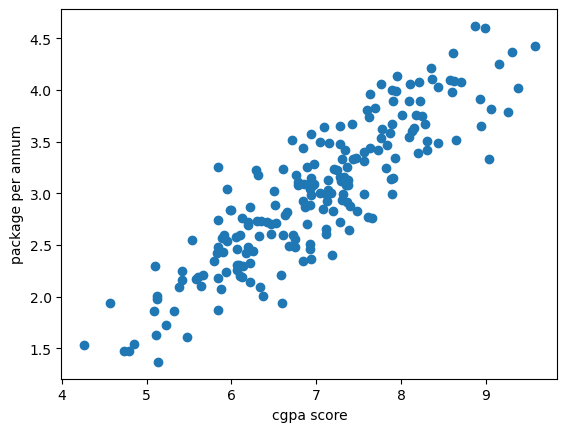

In [3]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()

In [4]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [7]:
# No preprocessing required in this simple linear regression model

In [8]:
# split the data int independent variable and dependent variable


In [9]:
x =df[['cgpa']]
y =df[['package']]

# double brackets to mention x and y as dataframes

In [10]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [11]:
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [12]:
df.shape

(200, 2)

In [13]:
# split the data into training and test where training is for building a model and test is for prediction

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state =100)

# if we don't use random state,for every run the order will get change.

In [14]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(140, 1) (60, 1) (140, 1) (60, 1)


# Building Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [16]:
# predict with test data
y_pred_test = linear_model.predict(x_test)
y_pred_train =linear_model.predict(x_train)


In [17]:
y_test

,package
126,2.60
104,3.74
99,3.24
92,4.00
111,2.25
167,3.60
116,3.33
96,2.61
52,4.11
69,2.94


## Evaluate the model

In [19]:
from sklearn.metrics import r2_score

In [20]:
print("Training Accuracy :", r2_score(y_train,y_pred_train))

print("************" * 5)

print("Test Accuracy :", r2_score(y_test, y_pred_test))

Training Accuracy : 0.7697135630254224
************************************************************
Test Accuracy : 0.778294297711575


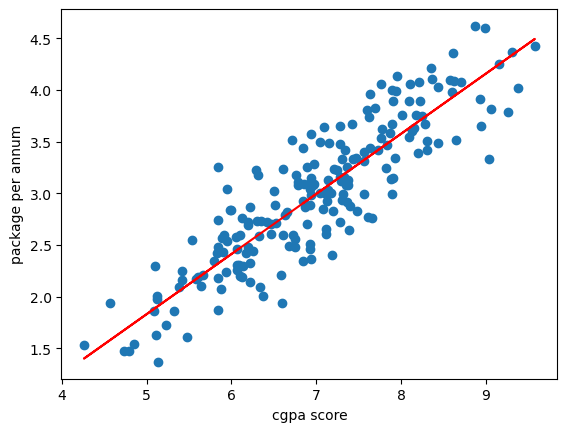

In [21]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(x_train, linear_model.predict(x_train), color ='red' )
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()

In [22]:
new_data = pd.read_excel("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\ML\cgpa_score.xlsx")
new_data

,cgpa
0,7
1,4
2,10
3,4
4,3
5,8
6,5
7,9
8,10
9,7


In [23]:
new_package =linear_model.predict(new_data)

C:\Users\achyu\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cgpa 
Feature names seen at fit time, yet now missing:
- cgpa

  warnings.warn(message, FutureWarning)


In [24]:
new_package

array([[2.99469131],
       [1.25096441],
       [4.73841821],
       [1.25096441],
       [0.66972211],
       [3.57593361],
       [1.83220671],
       [4.15717591],
       [4.73841821],
       [2.99469131],
       [4.15717591],
       [0.66972211],
       [2.41344901],
       [0.66972211],
       [0.66972211],
       [2.99469131],
       [1.83220671]])

In [25]:
package = pd.DataFrame(new_package)
package

,0
0,2.994691
1,1.250964
2,4.738418
3,1.250964
4,0.669722
5,3.575934
6,1.832207
7,4.157176
8,4.738418
9,2.994691


In [26]:
new_package_basis_cgpa = pd.concat([new_data,package],axis = 1)
new_package_basis_cgpa

,cgpa,0
0,7,2.994691
1,4,1.250964
2,10,4.738418
3,4,1.250964
4,3,0.669722
5,8,3.575934
6,5,1.832207
7,9,4.157176
8,10,4.738418
9,7,2.994691


In [27]:
new_package_basis_cgpa.to_csv('new_package_list.csv')

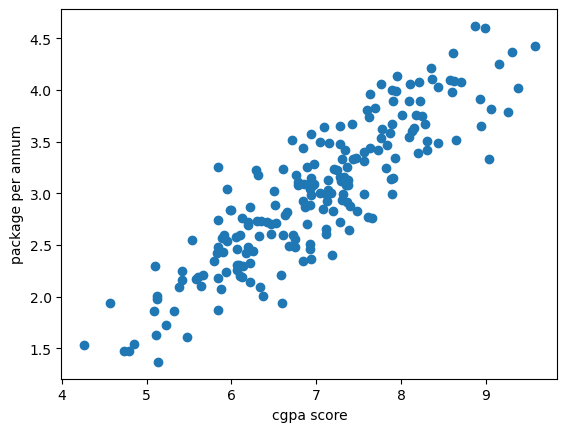

In [28]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()